The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
-> Opening file data/tempLog_prova.csv


(22.07, 23.17)

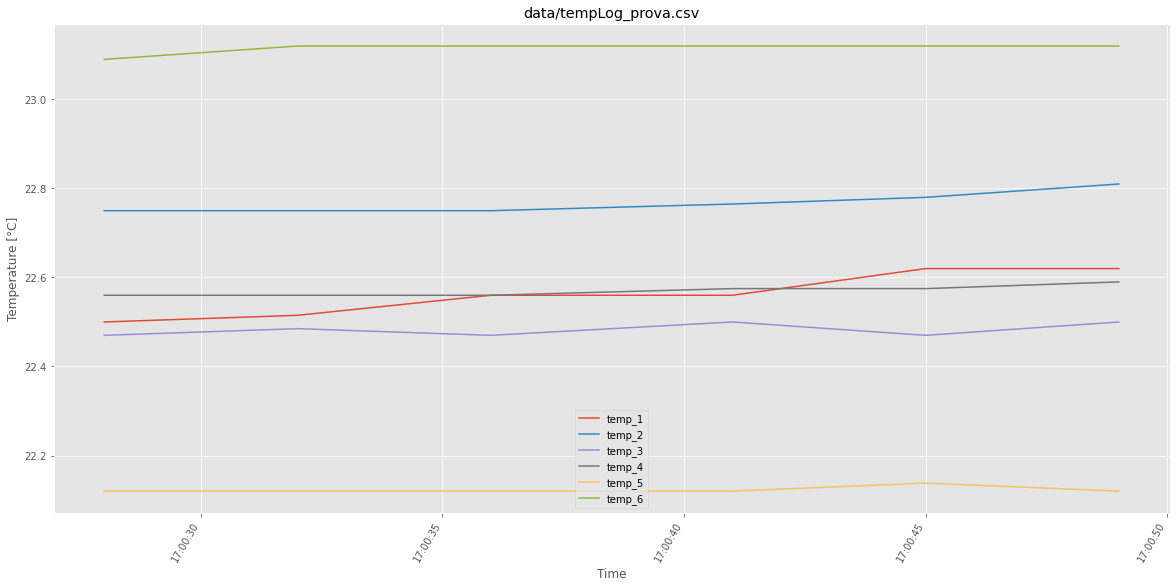

In [5]:
%load_ext autoreload
%autoreload 2
import matplotlib
import matplotlib.pyplot as mpl
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import scipy.integrate as integrate
import scipy.io as io
import scipy.signal as sig
import scipy.ndimage as ndmg
import scipy.stats as stat
import numpy as np
import pandas as pd
import seaborn as sns
import os
import time
import serial
import csv
import sys
import datetime as dt
from Settings import *
matplotlib.style.use('ggplot')
%matplotlib inline



if filePlot == 'LATEST':
    i=0
    while os.path.exists(f"{logFile}{i}.csv"):
        i += 1
    inFile = f"{logFile}{i}.csv"
else:
    inFile = f"{logFile}{filePlot}.csv"

print("-> Opening file " + inFile)

varNames = ["" for x in range(0, chanNo + 1)]
varNames[0] = "time"
for k in range(1, chanNo+1):
    varNames[k] = "temp_" + str(k)

df = pd.read_csv(inFile, names = varNames, header = None, sep = separator, skiprows=max(1, rowsToSkip))
df['time'] = [dt.datetime.strptime(datestr, timeTagFormat) for datestr in df['time']]
df.index = df['time']

df.replace(errorCode, np.NaN, inplace=True)
df.fillna(method='ffill', inplace=True)

plotObj = df[varNames[1:]].plot(figsize=(20,10), rot=60)
plotObj.set_title(inFile)
plotObj.set_ylabel("Temperature [°C]")
plotObj.set_xlabel("Time")
plotObj.set_ylim(yLimits)



